In [1]:
from LineageTrack.lineage_tracker import LineageTrack

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.signal import find_peaks

Load the data for cells from a directory containing the csv files only or input all the file paths

In [2]:
directory = "D:\\UROP-Data\\new_csv"
exp = LineageTrack(directory)
print(exp)
# or
# filepath1 = ""
# filepath2 = ""
# ...
# exp = LineageTrack(filepath1, filepath2, ...)

Looking for data at these locations:
D:\UROP-Data\new_csv\2022_04_22_PC_data_epoch_20_prob_99.csv
D:\UROP-Data\new_csv\2022_04_22_RFP_data_epoch_20_prob_99.csv
D:\UROP-Data\new_csv\2022_04_22_YFP_data_epoch_20_prob_99.csv
Finished loading the data
   trench_id  time_(mins)  label   area  major_axis_length  minor_axis_length  \
0        0.0          0.0    1.0  238.0          53.914722           7.221878   

   centroid-0  centroid-1  centroid_local-0  centroid_local-1  \
0   94.672272   65.420166          23.67227          4.420168   

   PC_intensity_mean  mCherry_intensity_mean  YFP_intensity_mean  
0        2048.146973             2647.348633          148.050415  
(428063, 13)

            Read 3 files
            Channels: ['PC', 'YFP', 'mCherry']
            Properties for each cell: ['PC_intensity_mean', 'YFP_intensity_mean', 'area', 'centroid-0', 'centroid-1', 'centroid_local-0', 'centroid_local-1', 'label', 'mCherry_intensity_mean', 'major_axis_length', 'minor_axis_length', 'ti

### strategy 3 on the Log Book
Estimate the growth rate and doubling time

Model: L = L0*exp(t *tau)

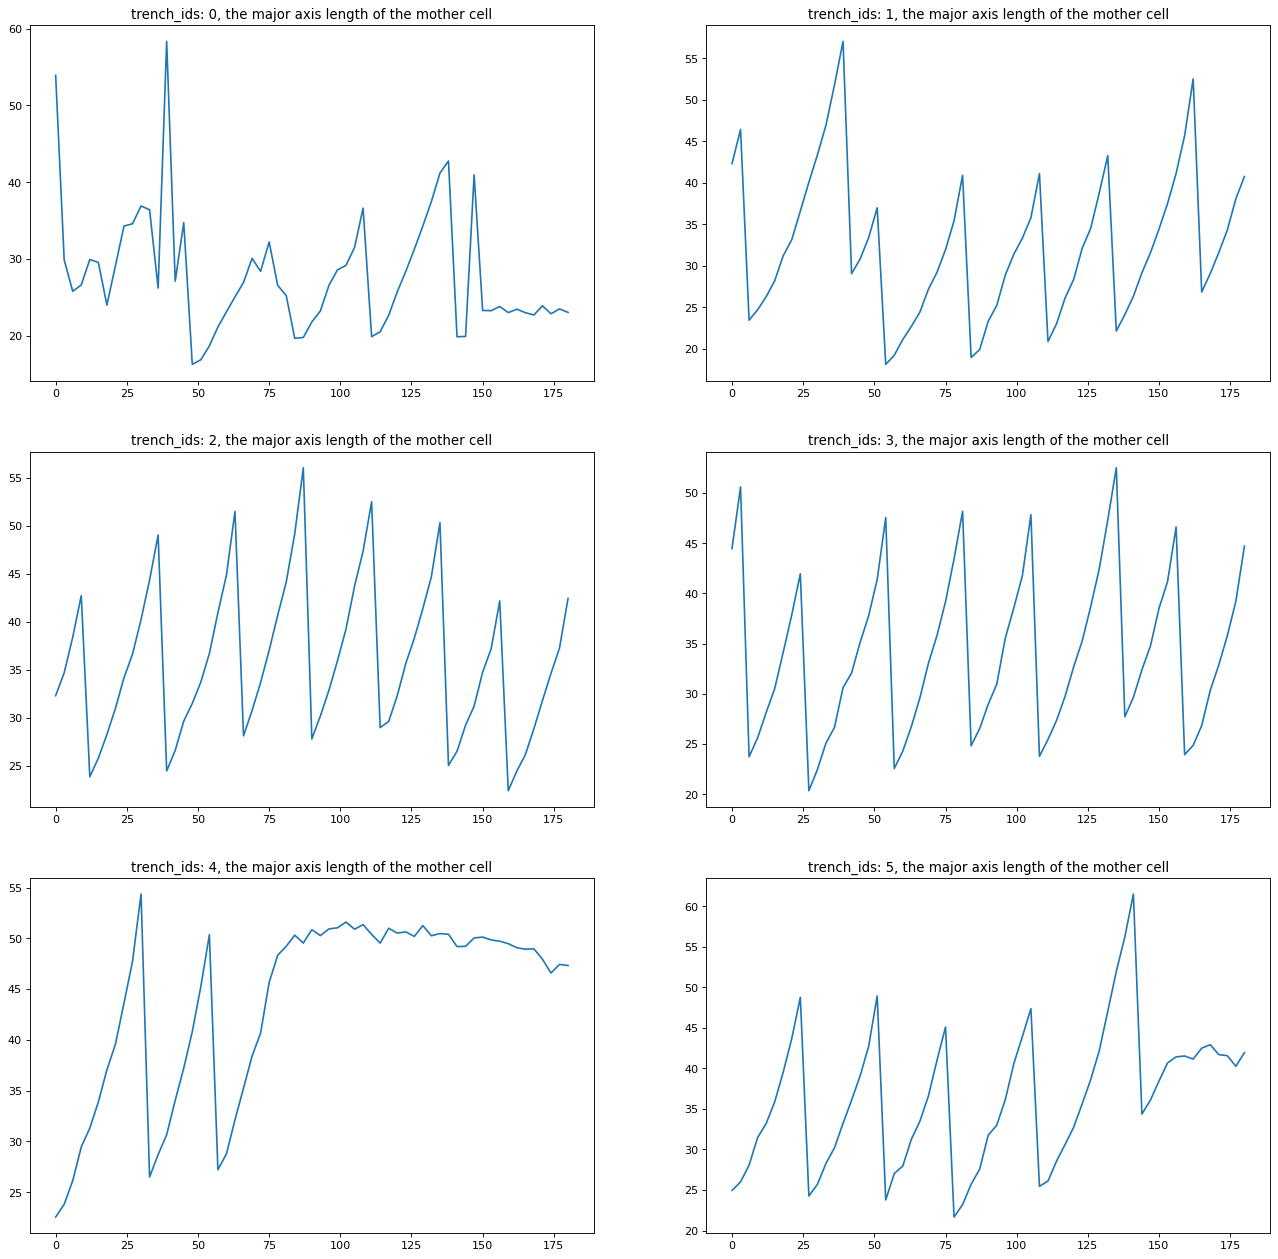

In [3]:
trench_list = [i for i in range(6)]

m = exp.get_mother_cell_growth(trench_list, plot=True)

Find the division times for trench 1

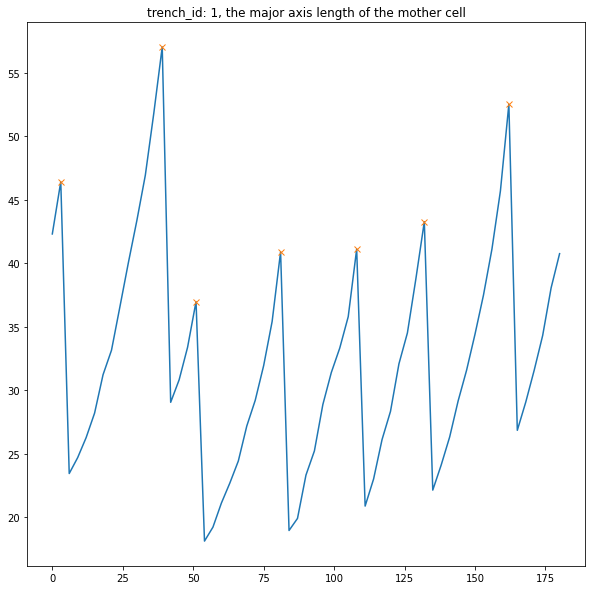

[[  3.          46.41300583]
 [ 39.          57.02418137]
 [ 51.          36.97775269]
 [ 81.          40.89678574]
 [108.          41.11452484]
 [132.          43.26797485]
 [162.          52.50556564]]


In [4]:
#from scipy.signal import find_peaks
#import matplotlib.pyplot as plt

#trench = 7
#mcell = exp.df.loc[(exp.df["label"] == 1) & (exp.df["trench_id"] == trench), ["time_(mins)", "major_axis_length"]].copy()
#mcell = mcell.to_numpy()
#peaks = find_peaks(mcell[:,1], threshold=1, distance=3)
#print(peaks)

#plt.figure(figsize=(10, 10))
#plt.plot(mcell[:, 0], mcell[:, 1])
#for p in peaks[0]:
#    print(p)
#    print(mcell[p, :])
#    plt.plot(mcell[p, :][0], mcell[p, :][1], "x")
#plt.title(f"trench_id: {trench}, the major axis length of the mother cell")
#plt.show()
mcell, idx = exp.find_division(1)

peaks = [mcell[i, :] for i in idx[0]]
peaks = np.array(peaks)
print(peaks)

Select the peaks between the exponential growth phase, calculate intervals between division and for each interval, estimate the growth constant

[36.0, 12.0, 30.0, 27.0, 24.0, 30.0]
the slope is estimated to be 0.026944527302591767
the intercept is estimated to be 3.1200443619009968


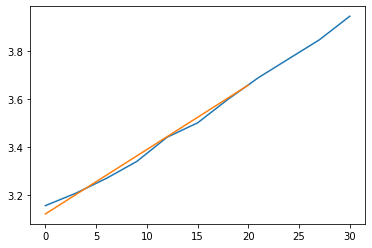

the slope is estimated to be 0.02317866695873853
the intercept is estimated to be 3.3655805049422343


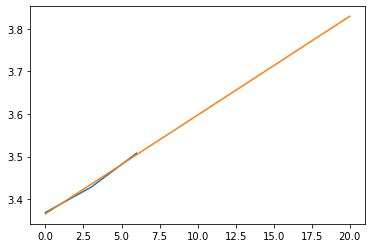

the slope is estimated to be 0.02794560923850282
the intercept is estimated to be 2.879120237941705


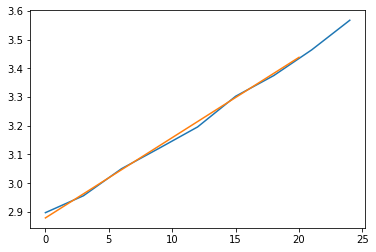

the slope is estimated to be 0.03194038417672666
the intercept is estimated to be 2.9401880450791413


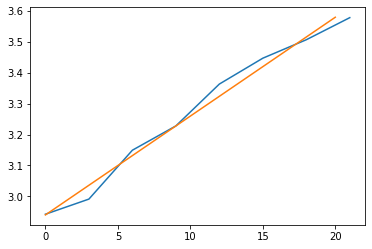

the slope is estimated to be 0.03418808296622025
the intercept is estimated to be 3.0421432767315983


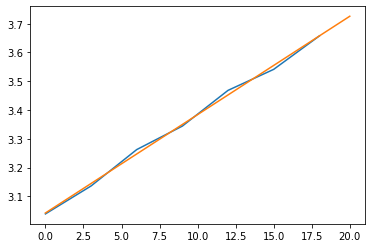

the slope is estimated to be 0.029835511786110564
the intercept is estimated to be 3.095027155199374


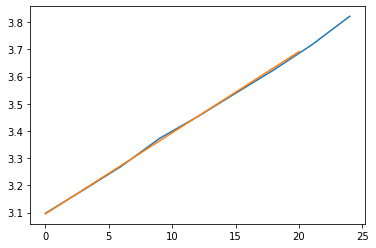

[36.0, 12.0, 30.0, 27.0, 24.0, 30.0]
[0.026944527302591767, 0.02317866695873853, 0.02794560923850282, 0.03194038417672666, 0.03418808296622025, 0.029835511786110564]


In [5]:
# slice it according to the data
e_phase_idx = idx[0][:]

exp.collect_model_para(mcell, e_phase_idx, plot=True)
print(exp.div_intervals)
print(exp.growth_taus)

#e_peaks = [mcell[p, :] for p in e_phase_idx]
#e_peaks = np.array(e_peaks)

#intervals = [e_peaks[i+1][0] - e_peaks[i][0] for i in range(len(e_peaks)-1)]
#division_time += intervals
#print(division_time)

#for i in range(len(e_phase_idx)-1):
#    growth = mcell[e_phase_idx[i]+1:e_phase_idx[i+1]]
#    print(growth)
#    plt.plot(growth[:, 0] - growth[0, 0], np.log(growth[:, 1]))
#    slope, inter, r, p, se = linregress(growth[:, 0], np.log(growth[:, 1]))
#    print(slope)
#    print(inter)
#    growth_tau.append(slope)
#    growth_scale.append(inter)
#    plt.show()

Repeat for trench 2, and so on

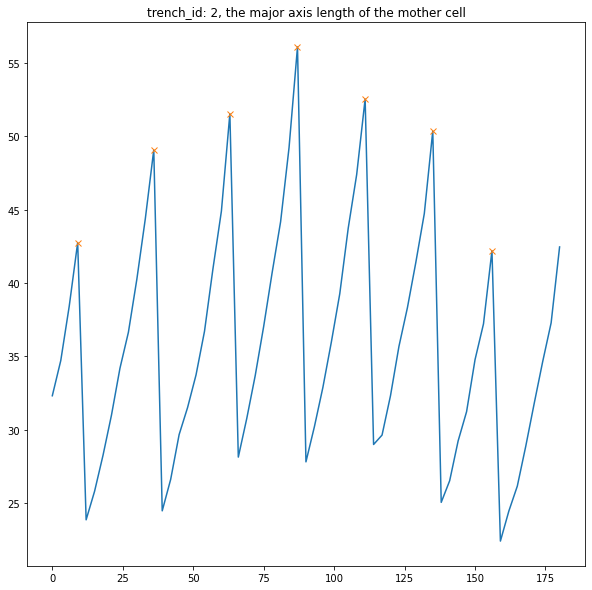

In [10]:
mcell, idx = exp.find_division(2)

In [11]:
# slice it according to the data
e_phase_idx = idx[0][:]    # in this case data between every peaks can be used

exp.collect_model_para(mcell, e_phase_idx)

[27.0, 27.0, 24.0, 24.0, 24.0, 21.0]


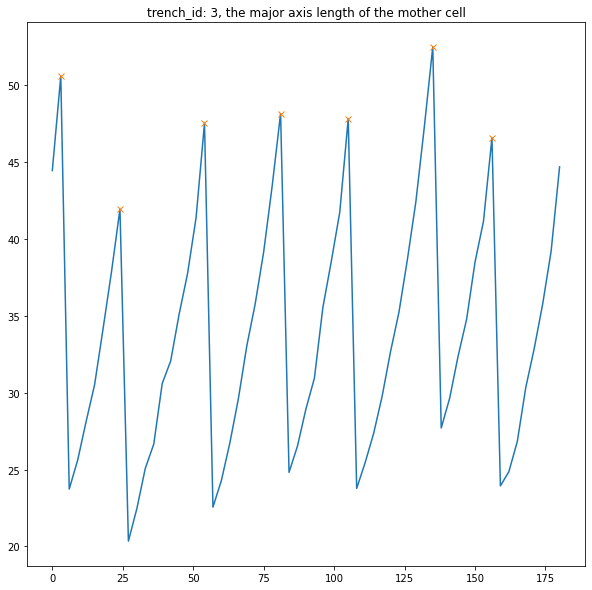

In [12]:
mcell, idx = exp.find_division(3)

In [13]:
# slice it according to the data
e_phase_idx = idx[0][:]    # in this case data between every peaks can be used

exp.collect_model_para(mcell, e_phase_idx)

[21.0, 30.0, 27.0, 24.0, 30.0, 21.0]


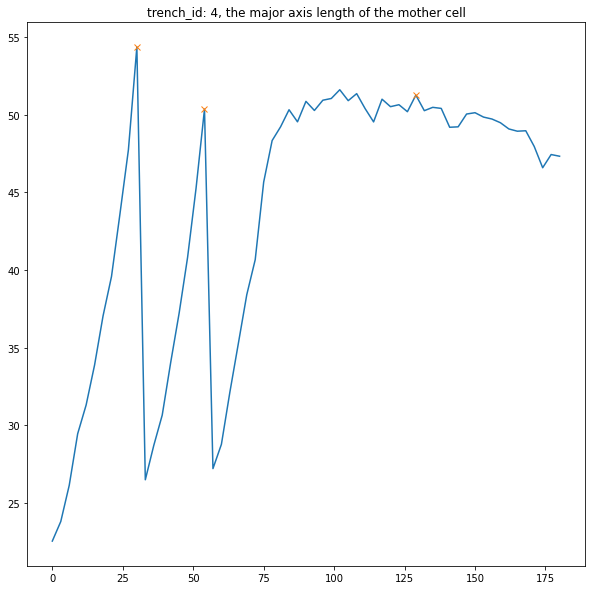

In [14]:
mcell, idx = exp.find_division(4)

In [15]:
# slice it according to the data
e_phase_idx = idx[0][:-1]    # do not use the last peak

exp.collect_model_para(mcell, e_phase_idx)

[24.0]


In [16]:
print(exp.div_intervals)
print(exp.growth_taus)

exp.update_model_para()

[36.0, 12.0, 30.0, 27.0, 24.0, 30.0, 24.0, 27.0, 27.0, 24.0, 24.0, 24.0, 21.0, 21.0, 30.0, 27.0, 24.0, 30.0, 21.0, 24.0]
[0.026944527302591767, 0.02317866695873853, 0.02794560923850282, 0.03194038417672666, 0.03418808296622025, 0.029835511786110564, 0.029816421892682632, 0.02950285481665465, 0.02818428768360482, 0.030799913320627276, 0.029928925532678244, 0.025453868699154905, 0.027179053964198636, 0.031240543653193682, 0.029190574000843402, 0.031574535584450274, 0.029905628612991397, 0.028591640334765103, 0.026991228890287614, 0.029816421892682632]

                The average time interval for division is 25.35
                The time constant for exponential growth is 0.029110434065385292
